### handling the imbalanced dataset

### 1.Up-sampling
### 2.Down-sampling

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
n_samples = 1000
class_0_ratio = 0.9

n_class_0 = int( class_0_ratio * n_samples )

n_class_1 = n_samples - n_class_0

In [4]:
n_class_0 ,n_class_1

(900, 100)

### dataframe with the imbalanced dataset

In [5]:
class_0 = pd.DataFrame(
    {
        'feature_1':np.random.normal(loc=0 , scale=1 , size=n_class_0),
        'feature_2':np.random.normal(loc=0 , scale=1 , size=n_class_0),
        'target':[0]*n_class_0
    }
)

In [6]:
class_1 = pd.DataFrame(
    {
        'feature_1':np.random.normal(loc=0 , scale=1 , size=n_class_1),
        'feature_2':np.random.normal(loc=0 , scale=1 , size=n_class_1),
        'target':[1]*n_class_1
    }
)

In [7]:
df = pd.concat([class_0,class_1],axis=0).reset_index(drop=True)

In [8]:
df.head(5)

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [9]:
df.tail()

,feature_1,feature_2,target
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1
999,-0.295480,-0.744903,1


In [10]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [11]:
df_minority = df[ df['target'] == 1 ]

df_majority = df[ df['target'] == 0 ]

### upsampling

In [12]:
from sklearn.utils import resample

In [13]:
df_minority_upsample = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=43
)

In [14]:
df_minority_upsample

,feature_1,feature_2,target
968,-1.090966,-0.194908,1
964,1.304340,0.555604,1
949,0.427194,-0.051394,1
921,0.076852,0.747910,1
958,0.288694,1.056057,1
...,...,...,...
964,1.304340,0.555604,1
968,-1.090966,-0.194908,1
919,-0.987180,-0.472091,1
917,-0.719153,-0.620848,1


In [15]:
df_upsample = pd.concat(
    [class_0 , df_minority_upsample]
).reset_index(drop=True)

In [16]:
df_upsample.shape

(1800, 3)

In [17]:
df_upsample['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [18]:
df_upsample

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,1.304340,0.555604,1
1796,-1.090966,-0.194908,1
1797,-0.987180,-0.472091,1
1798,-0.719153,-0.620848,1


### Down sampling

In [19]:
df_majority_downsample = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=43
)

In [20]:
df_down_sample = pd.concat(
    [df_minority , df_majority_downsample]
).reset_index(drop=True)

In [21]:
df_down_sample.shape

(200, 3)

In [22]:
df_down_sample

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1
...,...,...,...
195,-1.758739,0.599929,0
196,-0.513867,-1.366879,0
197,-0.544383,1.195047,0
198,1.551152,-1.065114,0


In [23]:
import matplotlib.pyplot as plt

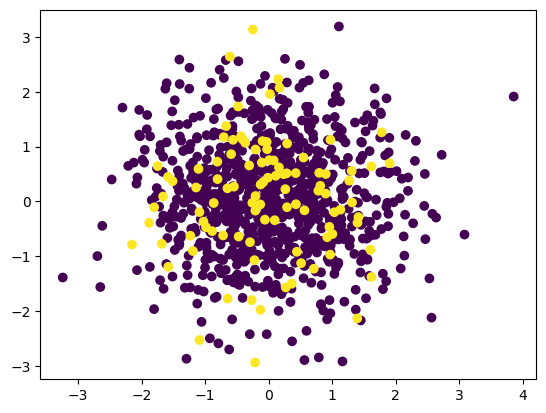

In [24]:
plt.scatter(df['feature_1'],df['feature_2'] , c = df['target'])
plt.show()

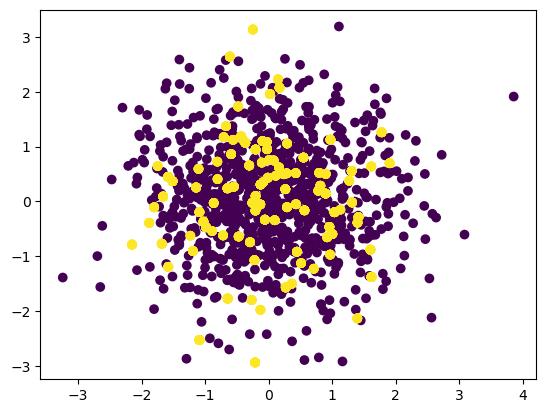

In [25]:
plt.scatter(df_upsample['feature_1'],df_upsample['feature_2'] , c = df_upsample['target'])
plt.show()

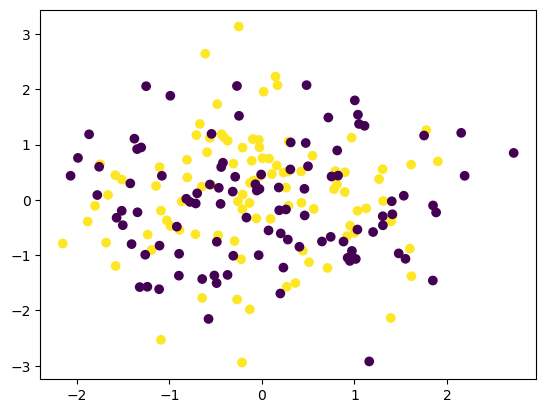

In [26]:
plt.scatter(df_down_sample['feature_1'],df_down_sample['feature_2'] , c = df_down_sample['target'])
plt.show()

## SMOTE(Synthetic Minority Oversampling Technique)
## SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [27]:
df.shape

(1000, 3)

In [28]:
# !pip install imblearn

In [29]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(df[['feature_1','feature_2']], df['target'])

In [30]:
X_resampled

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.701868,-0.173309
1796,1.545917,-1.335943
1797,1.358114,-0.225781
1798,0.486916,-0.147628


In [31]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

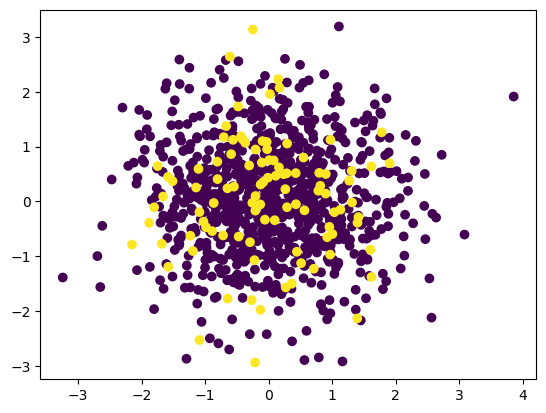

In [32]:
plt.scatter(df['feature_1'],df['feature_2'] , c = df['target'])
plt.show()

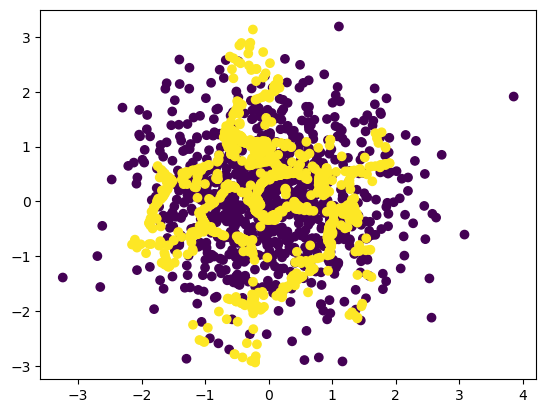

In [33]:
plt.scatter(X_resampled['feature_1'],X_resampled['feature_2'] , c = y_resampled)
plt.show()